In [1]:
import sys
from tqdm import tqdm as tqdm
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
import pandas as pd
import anndata
import anndata as ad
import numpy as np
from scipy import sparse
from tqdm import tqdm
import scanpy as sc
import qnorm
import matplotlib.pyplot as plt
import seaborn as sns
import tables

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
i = 0

In [4]:
df = anndata.read_h5ad('../../NO_BACKUP/tahoe/pseudobulks/plate14/bulk_1.h5ad')

In [5]:
df.obs = df.obs.reset_index()#['sm_cl'].duplicated()

In [6]:
df.obs['bulk'] = 'bulk_' + str(i+1)

In [7]:
df.obs['bulk_id'] = df.obs['bulk'] + '_id_'+ df.obs['index']

In [8]:
df.obs = df.obs.set_index('bulk_id')

In [9]:
for i in tqdm(range(1, 100)):
    
    df_ = anndata.read_h5ad('../../NO_BACKUP/tahoe/pseudobulks/plate14/bulk_' + str(i+1) + '.h5ad')
    df_.obs = df_.obs.reset_index()#['sm_cl'].duplicated()
    df_.obs['bulk'] = 'bulk_' + str(i+1)
    df_.obs['bulk_id'] = df_.obs['bulk'] + '_id_'+ df_.obs['index']
    df_.obs = df_.obs.set_index('bulk_id')
    
    df = ad.concat([df, df_], join='outer')

100%|██████████| 99/99 [08:09<00:00,  4.94s/it]


In [10]:
df.write_h5ad('../../NO_BACKUP/tahoe/pseudobulks/plate14_bulk.h5ad')

In [11]:
#df = ad.read_h5ad('../../NO_BACKUP/tahoe/pseudobulks/plate3_bulk.h5ad')

In [12]:
df.obs['cl_sm_dose'] = (df.obs['sm_cl'].astype(str) + '_' + df.obs['drugname_drugconc'].str.strip('()[]').str.split(',').str[1].str.strip()).astype('category')

In [13]:
df.obs['cl_sm_dose_bulk'] = (df.obs['cl_sm_dose'].astype(str) + df.obs['bulk'].astype(str)).astype('category')
#[df.obs['sample_cell_line'].duplicated()]
#['cl_sm_dose']# = df.obs['dose_sm_cl']

In [14]:
df.obs

,index,sample_cell_line,cell_line,plate,drugname_drugconc,sm_cl,cell_name,sample,drug,bulk,cl_sm_dose,cl_sm_dose_bulk
bulk_id,,,,,,,,,,,,
bulk_1_id_0,0,smp_2743_CVCL_0023,CVCL_0023,plate14,"[('8-Hydroxyquinoline', 5.0, 'uM')]",CVCL_0023_8-Hydroxyquinoline,A549,smp_2743,8-Hydroxyquinoline,bulk_1,CVCL_0023_8-Hydroxyquinoline_5.0,CVCL_0023_8-Hydroxyquinoline_5.0bulk_1
bulk_1_id_1,1,smp_2743_CVCL_0028,CVCL_0028,plate14,"[('8-Hydroxyquinoline', 5.0, 'uM')]",CVCL_0028_8-Hydroxyquinoline,AN3 CA,smp_2743,8-Hydroxyquinoline,bulk_1,CVCL_0028_8-Hydroxyquinoline_5.0,CVCL_0028_8-Hydroxyquinoline_5.0bulk_1
bulk_1_id_2,2,smp_2743_CVCL_0069,CVCL_0069,plate14,"[('8-Hydroxyquinoline', 5.0, 'uM')]",CVCL_0069_8-Hydroxyquinoline,SK-MEL-2,smp_2743,8-Hydroxyquinoline,bulk_1,CVCL_0069_8-Hydroxyquinoline_5.0,CVCL_0069_8-Hydroxyquinoline_5.0bulk_1
bulk_1_id_3,3,smp_2743_CVCL_0099,CVCL_0099,plate14,"[('8-Hydroxyquinoline', 5.0, 'uM')]",CVCL_0099_8-Hydroxyquinoline,SNU-1,smp_2743,8-Hydroxyquinoline,bulk_1,CVCL_0099_8-Hydroxyquinoline_5.0,CVCL_0099_8-Hydroxyquinoline_5.0bulk_1
bulk_1_id_4,4,smp_2743_CVCL_0131,CVCL_0131,plate14,"[('8-Hydroxyquinoline', 5.0, 'uM')]",CVCL_0131_8-Hydroxyquinoline,A-172,smp_2743,8-Hydroxyquinoline,bulk_1,CVCL_0131_8-Hydroxyquinoline_5.0,CVCL_0131_8-Hydroxyquinoline_5.0bulk_1
...,...,...,...,...,...,...,...,...,...,...,...,...
bulk_100_id_1337,1337,smp_2838_CVCL_1716,CVCL_1716,plate14,"[('DMSO_TF', 0.0, 'uM')]",CVCL_1716_DMSO_TF,SW 1271,smp_2838,DMSO_TF,bulk_100,CVCL_1716_DMSO_TF_0.0,CVCL_1716_DMSO_TF_0.0bulk_100
bulk_100_id_1338,1338,smp_2838_CVCL_1717,CVCL_1717,plate14,"[('DMSO_TF', 0.0, 'uM')]",CVCL_1717_DMSO_TF,SW1417,smp_2838,DMSO_TF,bulk_100,CVCL_1717_DMSO_TF_0.0,CVCL_1717_DMSO_TF_0.0bulk_100
bulk_100_id_1339,1339,smp_2838_CVCL_1724,CVCL_1724,plate14,"[('DMSO_TF', 0.0, 'uM')]",CVCL_1724_DMSO_TF,SW48,smp_2838,DMSO_TF,bulk_100,CVCL_1724_DMSO_TF_0.0,CVCL_1724_DMSO_TF_0.0bulk_100


In [15]:
df_agg = sc.get.aggregate(
    df, by=["cl_sm_dose_bulk"], func=["mean"]
)

In [16]:
#df_mean_var = sc.get.aggregate(
#    df, by="cl_sm_dose", func=["mean", "var"]
#)

In [17]:
df_agg

AnnData object with n_obs × n_vars = 129393 × 12124
    obs: 'cl_sm_dose_bulk'
    layers: 'mean'

In [18]:
#df_agg.write_h5ad('../../NO_BACKUP/tahoe/aggregated/plate1_agg_median.h5ad')
#df_mean_var.write_h5ad('../../NO_BACKUP/tahoe/aggregated/plate1_agg_mean_var.h5ad')

In [19]:
#df_mean_var.layers['var']

In [20]:
df_agg.X = df_agg.layers['mean']

In [21]:
del df_agg.layers['mean']

In [22]:
#df_agg.X

In [23]:
sc.pp.normalize_total(df_agg)

In [24]:
sc.pp.log1p(df_agg, base=2)

In [25]:
#np.median(df_agg.X, axis=0).shape

In [26]:
def z_scores(X):
    print('calc median')
    median = np.median(X, axis=0)
    #print(median)
    print('calc diff')
    diff = X - median
    print('calc MAD')
    MAD = np.median(np.absolute(diff))
    print('calc z-scores')
    z = diff/(MAD * 1.4826)
    return z

In [27]:
z = z_scores(df_agg.X)

calc median
calc diff
calc MAD
calc z-scores


In [28]:
#sc.pp.scale(df_agg, max_value=10)

In [29]:
df_agg.obs['cl_sm_dose'] = df_agg.obs['cl_sm_dose_bulk'].astype(str).str.split('bulk').str[0]

In [30]:
df_agg.X = z

In [31]:
df_agg.X

array([[ 0.        ,  0.        ,  2.31304862, ...,  0.51513732,
         0.80313662,  0.02799694],
       [ 0.        ,  0.        ,  0.98113917, ...,  0.07472474,
        -1.32062418, -1.08337973],
       [ 0.        ,  0.        ,  0.        , ...,  1.27027635,
        -0.36054399, -2.13438587],
       ...,
       [ 0.        ,  0.        ,  1.06113734, ..., -0.34011573,
         0.59908698,  0.12898679],
       [ 0.        ,  0.        ,  0.92511307, ..., -0.68455483,
        -0.42455109, -0.19756819],
       [ 0.        ,  0.        ,  2.24599311, ..., -0.31760844,
         0.41720719,  0.67088151]], shape=(129393, 12124))

In [32]:
df_agg = sc.get.aggregate(
    df_agg, by="cl_sm_dose", func=["mean"]
)

In [33]:
df_agg.write_h5ad('../../NO_BACKUP/tahoe/aggregated/plate14_agg_z_scores.h5ad')

In [25]:
#scales_counts = sc.pp.normalize_total(df, target_sum=None, inplace=False)

In [26]:
#df.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True, base=2)

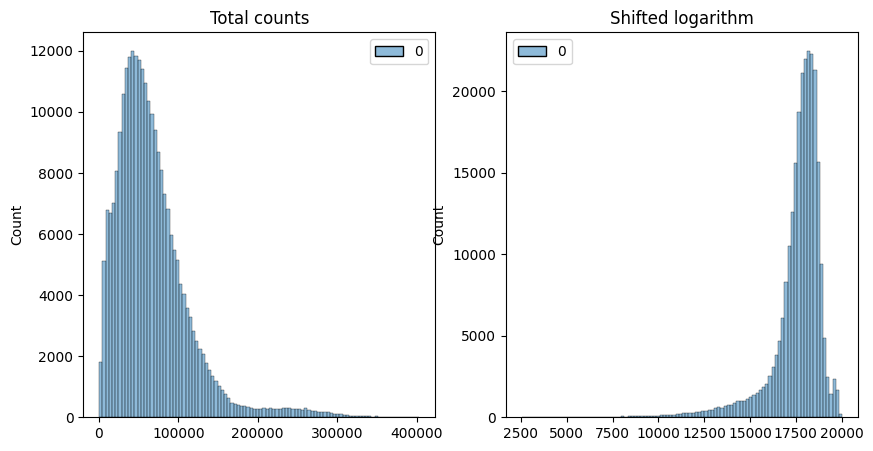

In [30]:
#fig, axes = plt.subplots(1, 2, figsize=(10, 5))
#p1 = sns.histplot(df.X.sum(1), bins=100, kde=False, ax=axes[0])
#axes[0].set_title("Total counts")
#p2 = sns.histplot(df.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
#axes[1].set_title("Shifted logarithm")
#plt.show()

In [4]:
import numpy as np
np.mean([25, 22,
35,
27,
21,
18,
28,
13,
22,
19,
27,
16,
29,
18])

22.857142857142858